In [2]:
import pandas as pd
from sklearn import metrics 

df = pd.read_csv("telecom_churn.csv", index_col=0)
df

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,,,,,,,,,,
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


In [3]:
#Search for null values: (None) 

print(
"Null values per column in this Dataset: \n", 
df.isnull().sum(axis = 0)
      )


Null values per column in this Dataset: 
 AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64


In [4]:
#Search for categorical columns: (None)

print(df.dtypes)

AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object


In [5]:
#Search for duplicates: (None)

duplicates = df.duplicated(keep='first')

print(
      'Numb_of_Duplicates:', duplicates,'\n',
      )

Numb_of_Duplicates: Churn
0    False
0    False
0    False
0    False
0    False
     ...  
0    False
0    False
0    False
0    False
0    False
Length: 3333, dtype: bool 



<AxesSubplot:xlabel='AccountWeeks'>

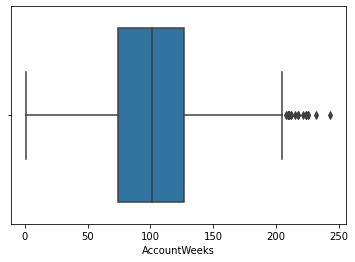

In [6]:
#Search for outliers in numerical columns
    #Using SNS whisker plots(boxplots)

import seaborn as sns

sns.boxplot(x = df.AccountWeeks) 


#Based on just three boxplots, there are outliers present in this dataset. 

<AxesSubplot:xlabel='MonthlyCharge'>

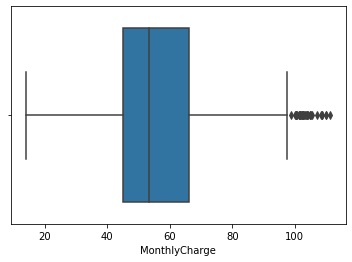

In [7]:
sns.boxplot(x = df.MonthlyCharge)

<AxesSubplot:xlabel='OverageFee'>

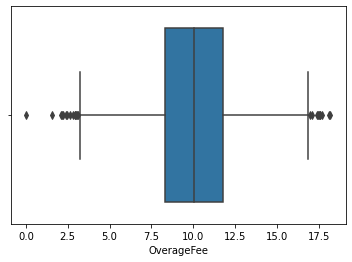

In [8]:
sns.boxplot(x = df.OverageFee)

In [9]:
#Scaling/Normalize Data 
#MinMaxScaler is used so that outliers do not have to be dropped.

numeric_columns = df[['AccountWeeks', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins']]

from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(numeric_columns)
# transform training data
normalized_numeric_data = norm.transform(numeric_columns)
cols = numeric_columns.columns.values
# normalized data to dataframe
normalized_numeric_data = pd.DataFrame(data = normalized_numeric_data, columns = cols)
print(normalized_numeric_data.head(5))

   AccountWeeks  DataUsage  CustServCalls   DayMins  DayCalls  MonthlyCharge  \
0      0.524793   0.500000       0.111111  0.755701  0.666667       0.770812   
1      0.438017   0.685185       0.111111  0.460661  0.745455       0.698869   
2      0.561983   0.000000       0.000000  0.693843  0.690909       0.390545   
3      0.342975   0.000000       0.222222  0.853478  0.430303       0.441932   
4      0.305785   0.000000       0.333333  0.475200  0.684848       0.277492   

   OverageFee  RoamMins  
0    0.542606     0.500  
1    0.537658     0.685  
2    0.333150     0.610  
3    0.170423     0.330  
4    0.407916     0.505  


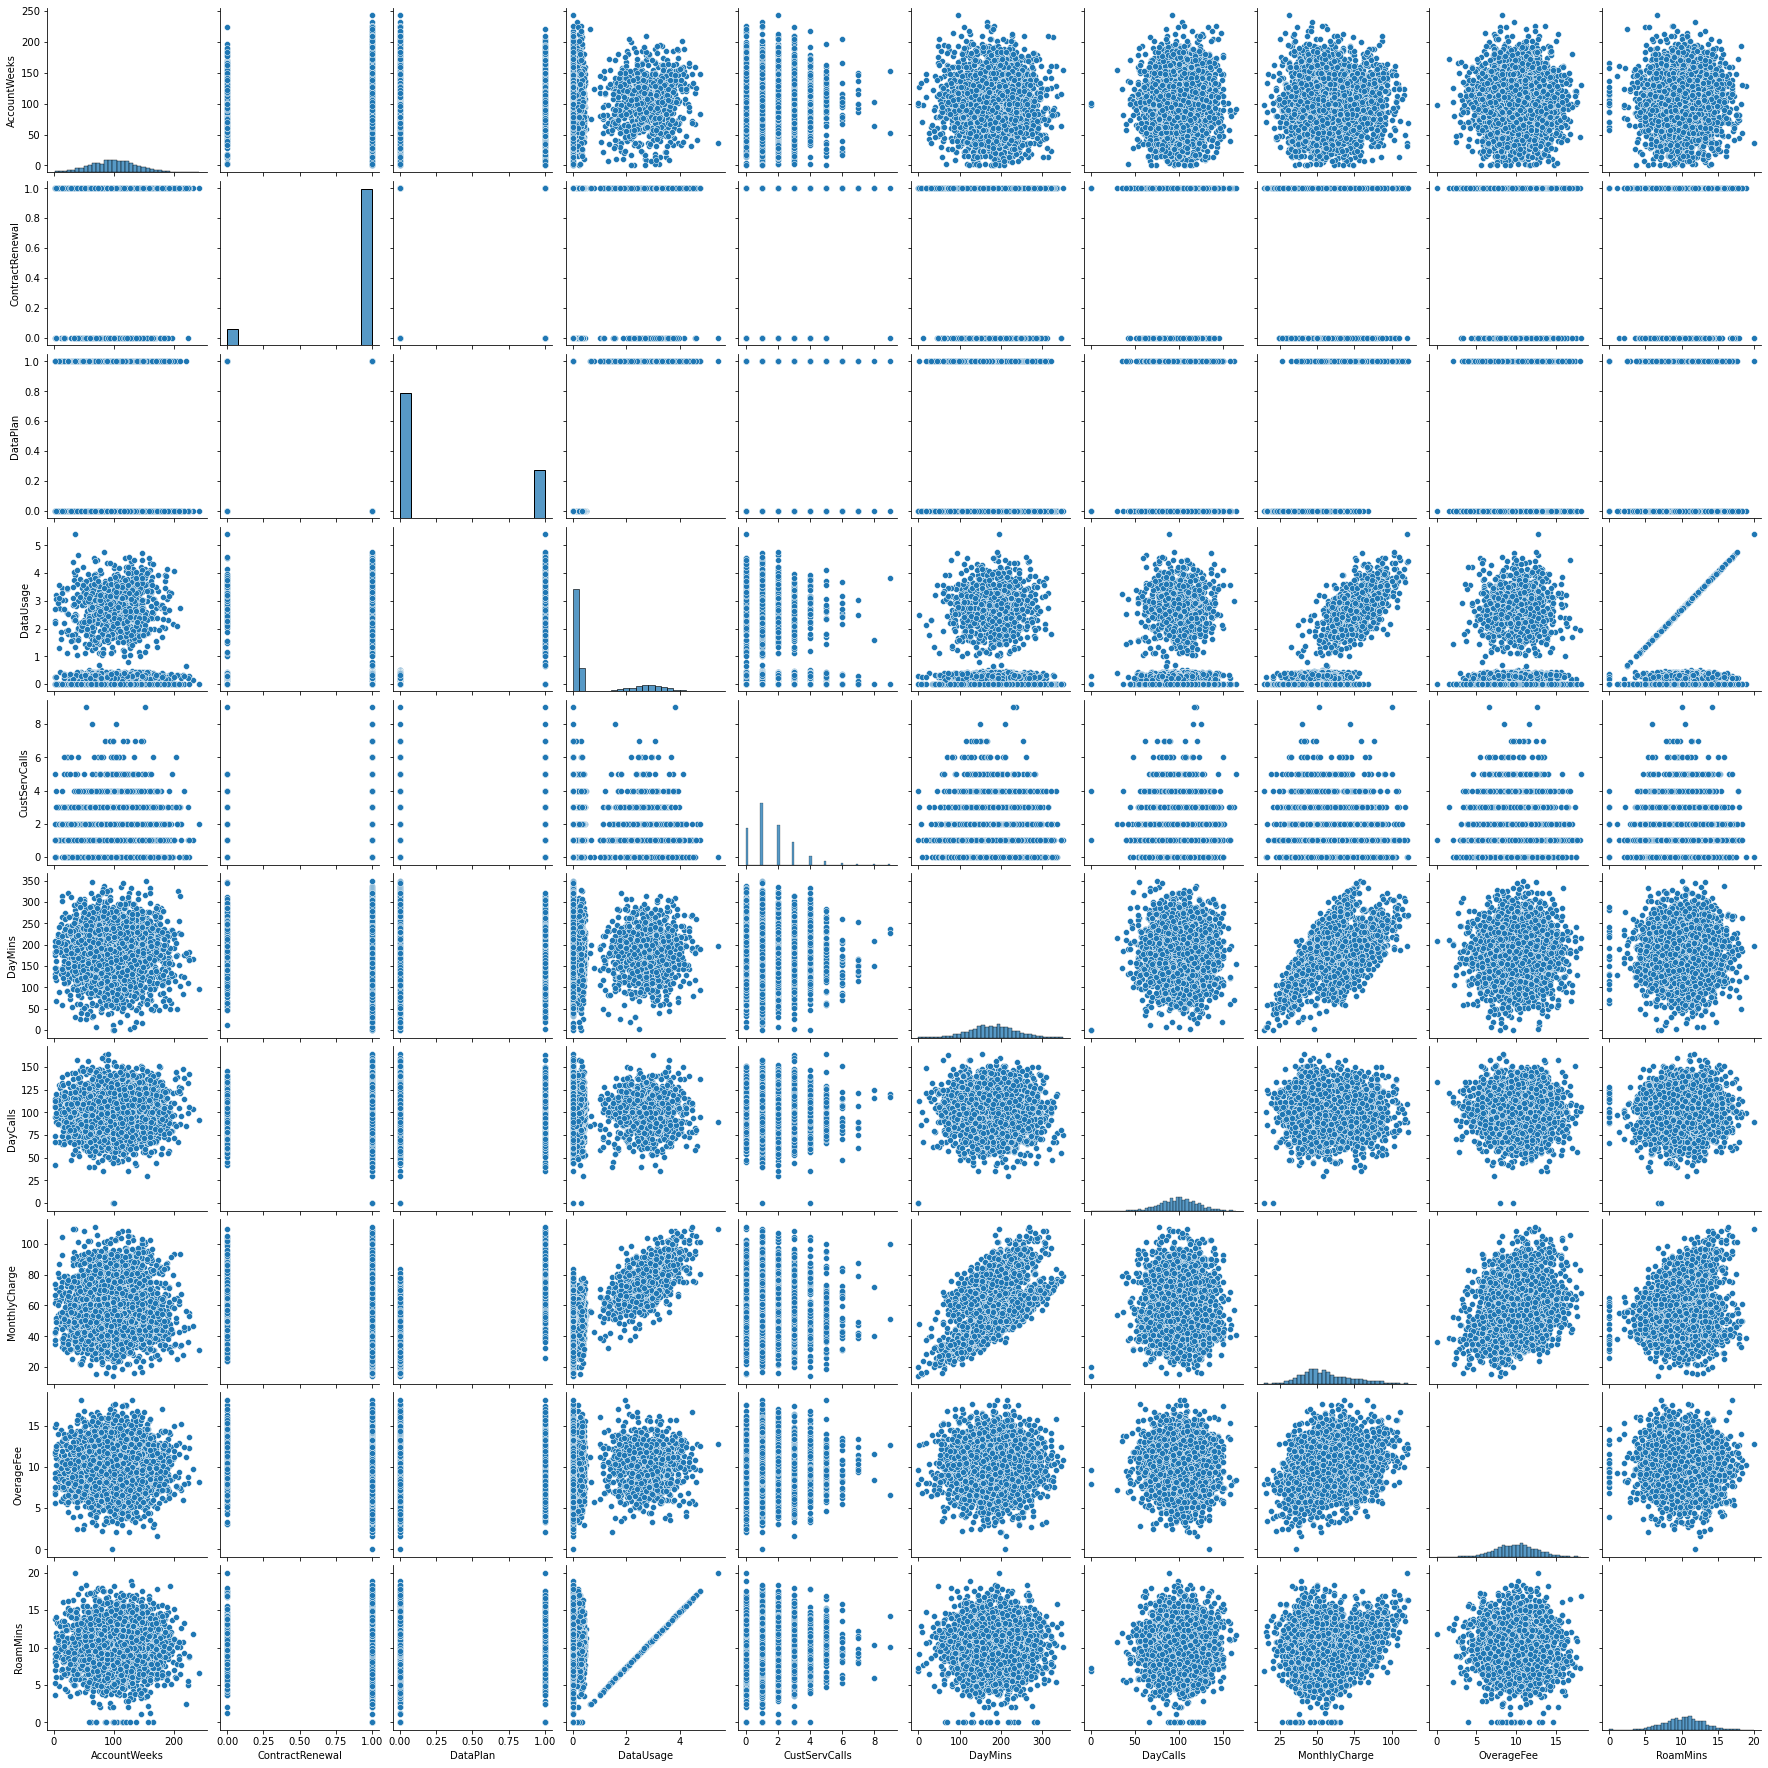

In [22]:
#Use pairplot to decide which is the best classification algorithim to use

import pandas as pd
import seaborn as sns

sns.pairplot(df)

#Since pairplot shows A LOT of overlap between features and nonlinearity , KNN will be used 
#KNN is best for this dataset because it uses euclidean distance to find similarity of points
# If KNN does not yield favorable accuracy, then DT or RF will be considered.

In [25]:
#Creating Train Test Split

from sklearn.model_selection import train_test_split
X=churn_data.loc[:, churn_data.columns != 'Churn']
y=churn_data['Churn']

NameError: name 'churn_data' is not defined

In [11]:
#Using KNN 
#Starting w/ k =1 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

pred=knn.predict(X_test)

#Evaluate accuracy w/k = 1

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

NameError: name 'X_train' is not defined